# Import the requerment Libraries

In [3]:
import numpy as np #for number array and rgb image pixel values and feautres
#to buid a dataframe for confusion matrix
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline
import os
import cv2
#to use tools needed for deep learning
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import LeakyReLU 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
np.random.seed(2)
#to generate random numbers
import random 
#fro models evaluation
from sklearn.metrics import confusion_matrix, classification_report
#RandomForest sklearn implementation
#from sklearn.ensemble import RandomForestClassifier
print('the Cell is executed without errors')

the Cell is executed without errors


# Data preprocessing¶


In [5]:
data_path=r"C:\Users\kabir\Projects\Projects_Acadimic\Amazigh_handwritten_character_recognition\data\raw\AMHCD_64"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'ya': 0, 'yab': 1, 'yach': 2, 'yad': 3, 'yadd': 4, 'yae': 5, 'yaf': 6, 'yag': 7, 'yagh': 8, 'yagw': 9, 'yah': 10, 'yahh': 11, 'yaj': 12, 'yak': 13, 'yakw': 14, 'yal': 15, 'yam': 16, 'yan': 17, 'yaq': 18, 'yar': 19, 'yarr': 20, 'yas': 21, 'yass': 22, 'yat': 23, 'yatt': 24, 'yaw': 25, 'yax': 26, 'yay': 27, 'yaz': 28, 'yazz': 29, 'yey': 30, 'yi': 31, 'yu': 32}
['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [6]:
img_size=64
data=[]
target=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
            #Coverting the image into gray scale
            resized=cv2.resize(thresh ,(img_size,img_size))
            #resizing the gray scale into 64x64, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [7]:
len(data)

25740

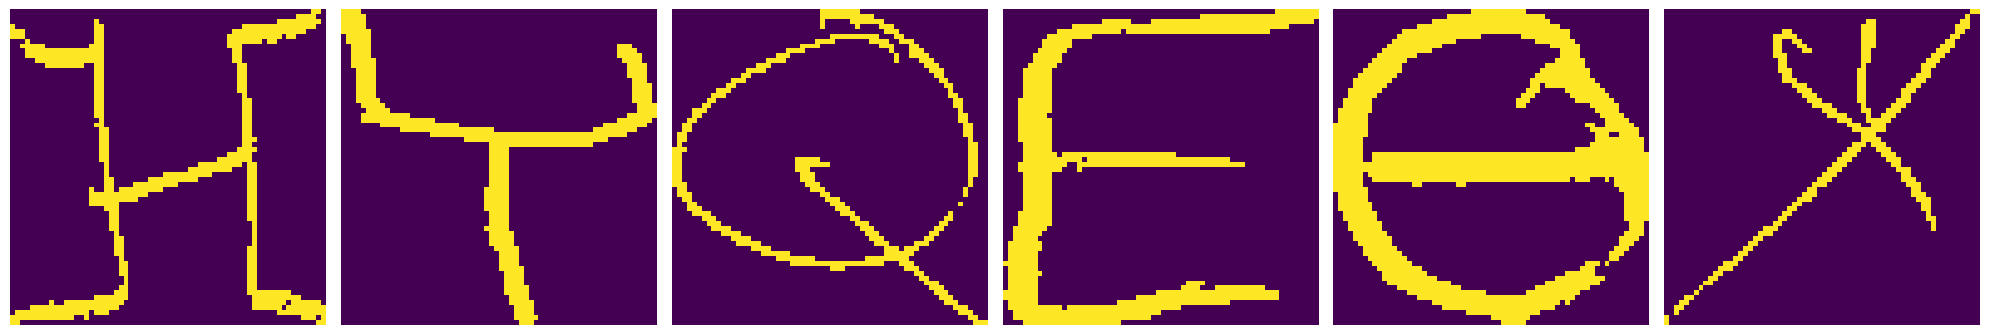

In [8]:
target=np.array(target)
from keras.utils import np_utils
target=np_utils.to_categorical(target)
data=np.array(data)
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
imgs=[]
for index in range(6):
    imgs.append(data[random.randint(0,data.shape[0])])  
plotImages(imgs)

In [11]:
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)
print(target.shape)

(25740, 64, 64, 1)
(25740, 33)


In [10]:
data=np.array(data)/255.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [14]:
# 1. Convolution
# 2. Activation
# 3. Polling
# 4. fully connected network
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64,64,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# Fully connected layer
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(33))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                        

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
checkpoint = ModelCheckpoint('modeltifinagh-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')
history=model.fit(X_train, y_train,epochs=30,callbacks=[checkpoint],verbose=1,validation_split=0.2)

Epoch 1/30
432/432 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8982

INFO:tensorflow:Assets written to: modeltifinagh-001.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-001.model\assets


432/432 [==============================] - 15s 18ms/step - loss: 0.3537 - accuracy: 0.8982 - val_loss: 0.1284 - val_accuracy: 0.9632
Epoch 2/30
429/432 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9784

INFO:tensorflow:Assets written to: modeltifinagh-002.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-002.model\assets


432/432 [==============================] - 6s 14ms/step - loss: 0.0659 - accuracy: 0.9785 - val_loss: 0.0877 - val_accuracy: 0.9748
Epoch 3/30
429/432 [============================>.] - ETA: 0s - loss: 0.0390 - accuracy: 0.9873

INFO:tensorflow:Assets written to: modeltifinagh-003.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-003.model\assets


432/432 [==============================] - 7s 15ms/step - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0826 - val_accuracy: 0.9771
Epoch 4/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0243 - accuracy: 0.9928 - val_loss: 0.1175 - val_accuracy: 0.9751
Epoch 5/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.1031 - val_accuracy: 0.9788
Epoch 6/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.1111 - val_accuracy: 0.9774
Epoch 7/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0978 - val_accuracy: 0.9780
Epoch 8/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 0.1055 - val_accuracy: 0.9820
Epoch 9/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0931 - val_accuracy: 0.9814
Epoch 10/3

INFO:tensorflow:Assets written to: modeltifinagh-010.model\assets


INFO:tensorflow:Assets written to: modeltifinagh-010.model\assets


432/432 [==============================] - 7s 16ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0579 - val_accuracy: 0.9849
Epoch 11/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0789 - val_accuracy: 0.9861
Epoch 12/30
432/432 [==============================] - 5s 11ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0890 - val_accuracy: 0.9832
Epoch 13/30
432/432 [==============================] - 5s 12ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0920 - val_accuracy: 0.9849
Epoch 14/30
432/432 [==============================] - 6s 13ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0851 - val_accuracy: 0.9849
Epoch 15/30
432/432 [==============================] - 5s 13ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0786 - val_accuracy: 0.9875
Epoch 16/30
432/432 [==============================] - 6s 13ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.1042 - val_accuracy: 0.9826
Epoc

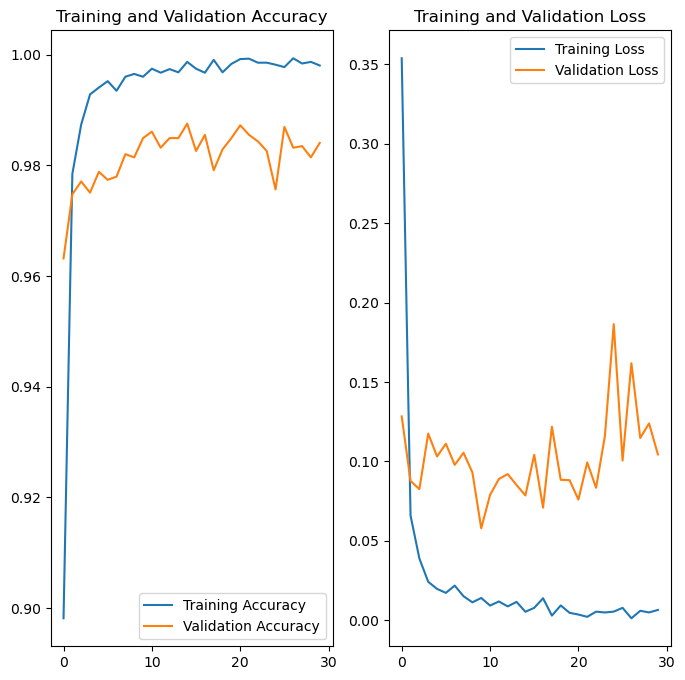

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

266/266 [==============================] - 2s 6ms/step - loss: 0.0902 - accuracy: 0.9860
Test accuracy:  0.9859917759895325


In [18]:
y_pred=np.argmax(model.predict(X_test),axis=1)
y_test=np.argmax(y_test,axis=1)
print(classification_report(y_pred,y_test))

266/266 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       0.99      0.99      0.99       245
           2       0.98      1.00      0.99       247
           3       0.99      0.99      0.99       268
           4       1.00      0.98      0.99       276
           5       1.00      0.99      1.00       266
           6       0.99      0.99      0.99       251
           7       0.98      0.99      0.99       246
           8       0.97      1.00      0.99       267
           9       0.99      0.99      0.99       241
          10       0.99      0.99      0.99       277
          11       0.99      0.98      0.98       258
          12       0.99      0.99      0.99       275
          13       0.98      0.98      0.98       248
          14       0.97      1.00      0.99       233
          15       0.99      0.98      0.99       270
          16       0.99   

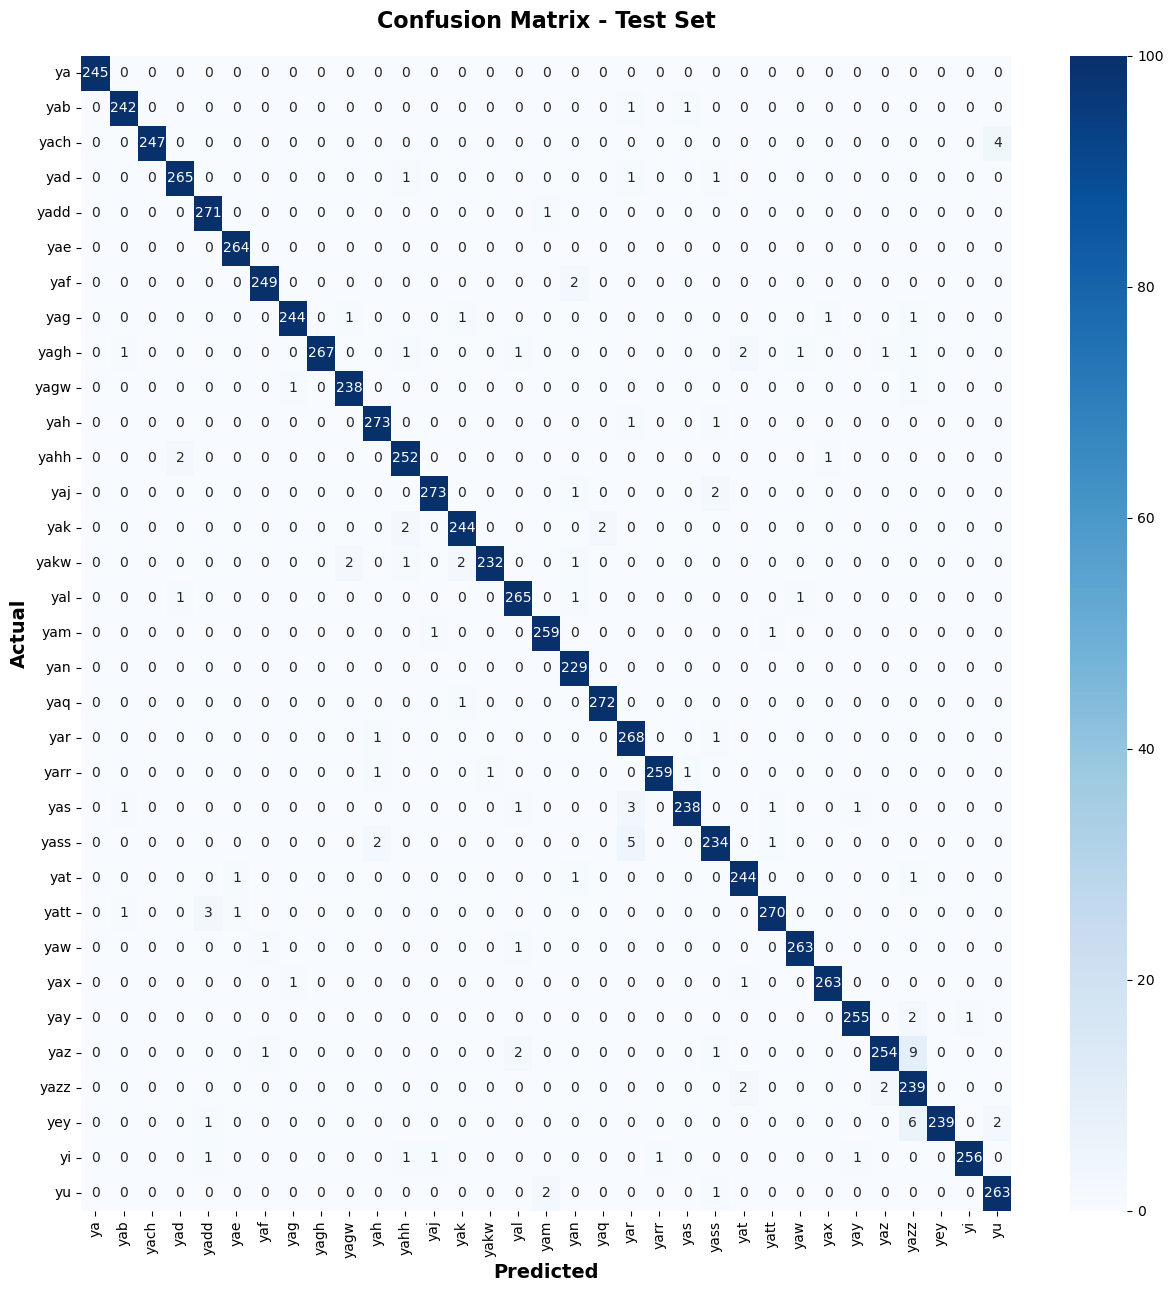

In [19]:
CMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=categories, index =categories)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 100,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')    
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);